In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

# 1. How computer see digits?

## 1.1 Black and white digits

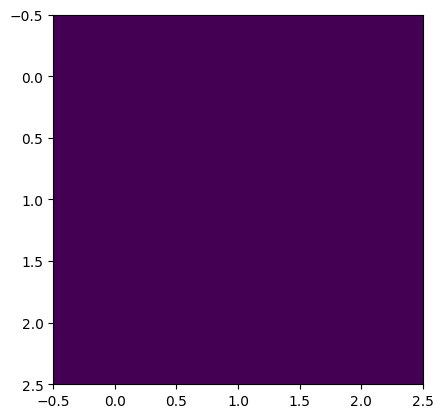

In [2]:
white_back = np. array(
        [[0, 0, 0], 
        [0, 0, 0], 
        [0, 0, 0]]
        )

plt.imshow(white_back)
plt.xticks()
plt.show()

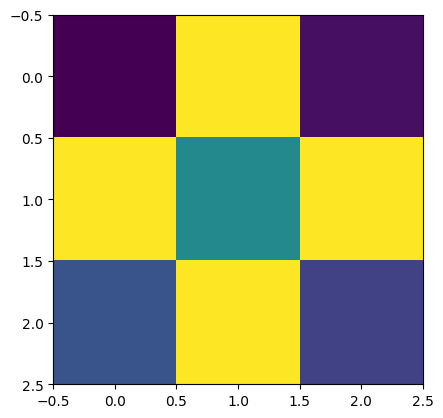

In [3]:
black_back = np. array(
        [[0, 255, 10], 
        [255, 120, 255], 
        [66, 255, 50]]
        )

plt.imshow(black_back)
plt.xticks()
plt.show()

### 1.2 Draw a chess board

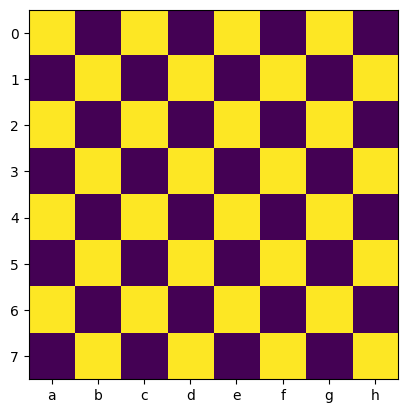

In [4]:
length = 8
board = [[0 if (i + j) % 2 else 255 for i in range(length)] for j in range(length)]
plt.imshow(board)
plt.xticks(range(0, length), ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
plt.yticks(range(0, length))
plt.show()

## 1.3 Colored images

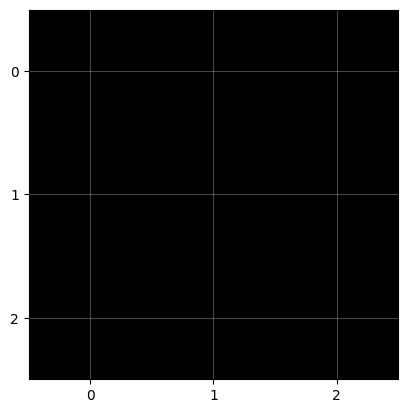

In [5]:
size = 3
arr = np.zeros((size, size, 3))
plt.xticks(range(size))
plt.yticks(range(size))
plt.grid(alpha=.4)
plt.imshow(arr)


In [6]:
arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

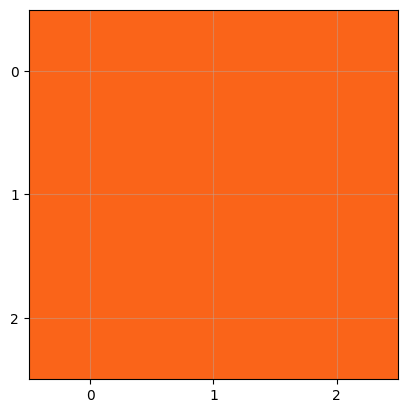

In [7]:
size = 3
arr = np.zeros((size, size, 3))
arr[:,:,0] = 250
arr[:,:,1] = 100
arr[:,:,2] = 25

arr = arr / 255.0

plt.xticks(range(size))
plt.yticks(range(size))
plt.grid(alpha=.4)
plt.imshow(arr)
plt.show()


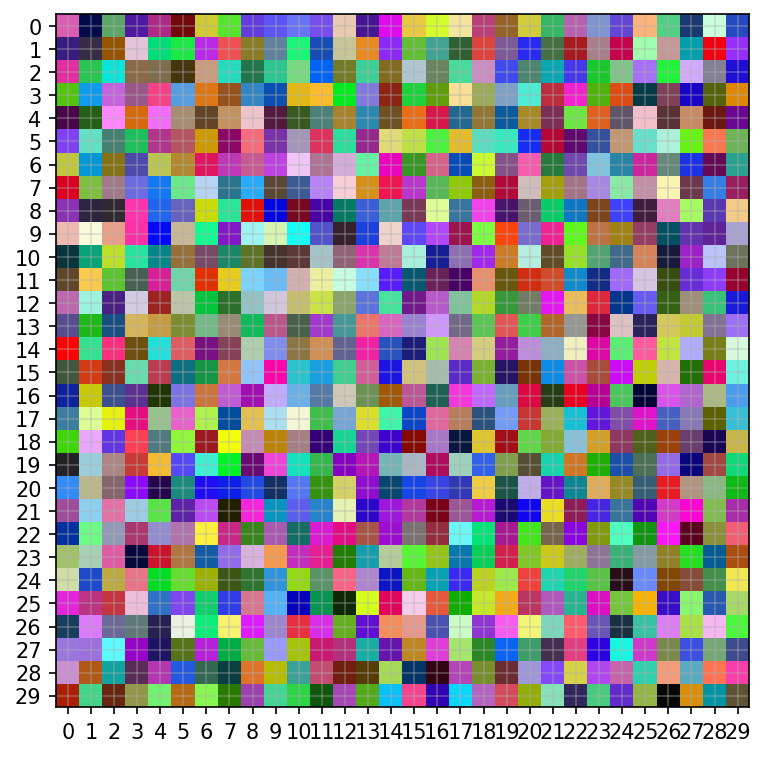

In [8]:
size = 30
arr = np.zeros((size, size, 3))
arr[:,:,0] = [[np.random.randint(255) for i in range(size)] for j in range(size)]
arr[:,:,1] = [[np.random.randint(255) for i in range(size)] for j in range(size)]
arr[:,:,2] = [[np.random.randint(255) for i in range(size)] for j in range(size)]

arr = arr / 255.0

plt.figure(figsize = (6, 6), dpi=150)
plt.xticks(range(size))
plt.yticks(range(size))
plt.grid(alpha=.4)
plt.imshow(arr)
plt.show()

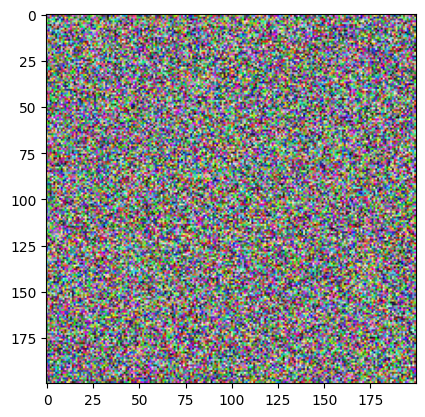

In [9]:
size = 200
arr = np.zeros((size,size,3))

arr[:,:,0] = [[np.random.randint(255) for i in range(size)] for i in range(size)]
arr[:,:,1] = [[np.random.randint(255) for i in range(size)] for i in range(size)]
arr[:,:,2] = [[np.random.randint(255) for i in range(size)] for i in range(size)]
arr = arr / 255.0

plt.imshow(arr)
plt.show()

# Digit classification

In [10]:
df = pd.read_csv('train.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [12]:
df.shape

(42000, 785)

# X, y split

In [13]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X = df.drop('label', axis=1)
y = df['label']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37800, 784), (37800,), (4200, 784), (4200,))

In [18]:
first_digit = X_train.iloc[23].to_numpy().reshape(28, 28)
for row in first_digit:
    for val in row:
        print(f'{val:^3}', end=' ')
    print()

 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
 0   0   0   0   0   0   0   0   0   0  20  81  136 136 136 236 254 254 255 155  5   0   0   0   0   0   0   0  
 0   0   0   0   0   0   8  36  78  154 249 253 253 253 253 253 253 253 253 253 142  0   0   0   0   0   0   0  
 0   0   0   0   0   0  79  253 253 253 253 253 253 253 253 233 200 200 231 253 232 116  0   0   0   0   0   0  
 0   0   0   0   0  10  194 253 253 253 253 253 189 65  65  41   0   0  52  229 253 194 10   0  

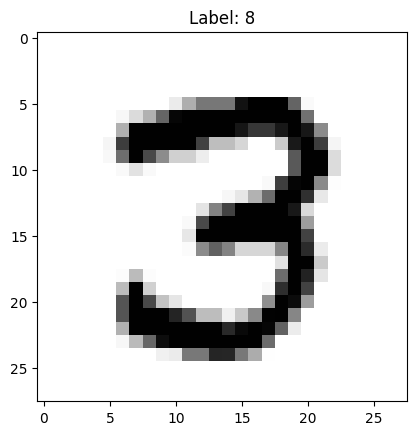

In [19]:
index = 101
plt.title(f'Label: {y_train.iloc[101]}')
plt.imshow(first_digit, cmap='binary')
plt.show()

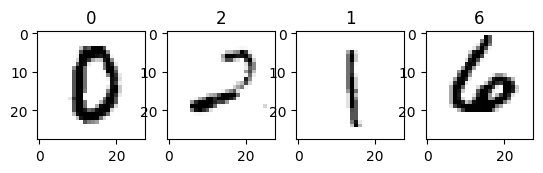

In [20]:
fig, ax = plt.subplots(ncols=4)
indexs = np.random.randint(X_train.shape[0], size=4)
ax[0].imshow(X_train.iloc[indexs[0]].to_numpy().reshape(28, 28), cmap='binary')
ax[1].imshow(X_train.iloc[indexs[1]].to_numpy().reshape(28, 28), cmap='binary')
ax[2].imshow(X_train.iloc[indexs[2]].to_numpy().reshape(28, 28), cmap='binary')
ax[3].imshow(X_train.iloc[indexs[3]].to_numpy().reshape(28, 28), cmap='binary')

ax[0].set_title(y_train.iloc[indexs[0]])
ax[1].set_title(y_train.iloc[indexs[1]])
ax[2].set_title(y_train.iloc[indexs[2]])
ax[3].set_title(y_train.iloc[indexs[3]])

plt.show()

# Transform taget

In [21]:
y_train = pd.get_dummies(y_train).astype(int)
y_test = pd.get_dummies(y_test).astype(int)

# Predictions with MLP

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [46]:
model = Sequential()
model.add(Dense(30, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics='accuracy')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                23550     
                                                                 
 dense_7 (Dense)             (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [47]:
batch_size = 32
epochs = 20
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), batch_size=batch_size, epochs=epochs, verbose=1)


Epoch 1/20
1182/1182 [==============================] - 2s 2ms/step - loss: 2.6679 - accuracy: 0.4927 - val_loss: 1.1525 - val_accuracy: 0.6179
Epoch 2/20
1182/1182 [==============================] - 2s 1ms/step - loss: 1.0843 - accuracy: 0.6527 - val_loss: 0.9369 - val_accuracy: 0.7155
Epoch 3/20
1182/1182 [==============================] - 1s 1ms/step - loss: 0.8712 - accuracy: 0.7175 - val_loss: 0.8671 - val_accuracy: 0.7798
Epoch 4/20
1182/1182 [==============================] - 2s 1ms/step - loss: 0.7186 - accuracy: 0.7829 - val_loss: 0.6871 - val_accuracy: 0.8064
Epoch 5/20
1182/1182 [==============================] - 2s 1ms/step - loss: 0.5747 - accuracy: 0.8361 - val_loss: 0.5676 - val_accuracy: 0.8702
Epoch 6/20
1182/1182 [==============================] - 2s 1ms/step - loss: 0.4761 - accuracy: 0.8746 - val_loss: 0.5100 - val_accuracy: 0.8826
Epoch 7/20
1182/1182 [==============================] - 2s 2ms/step - loss: 0.4112 - accuracy: 0.8906 - val_loss: 0.4455 - val_accuracy:

## Model validation

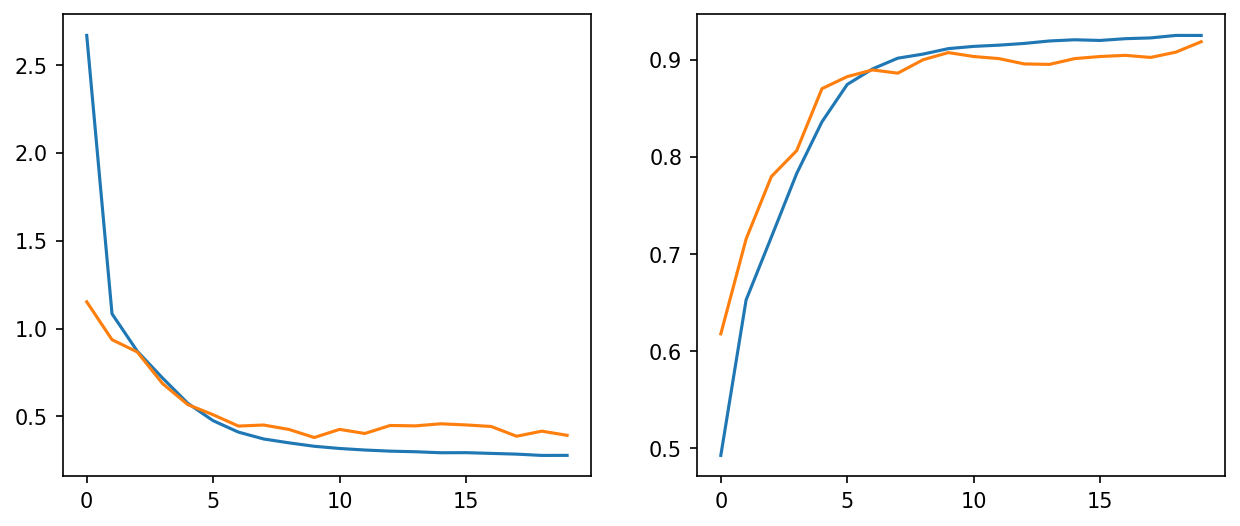

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4), dpi=150)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
plt.show()

In [50]:
y_pred = model.predict(X_test)

132/132 [==============================] - 0s 2ms/step


In [55]:
for i in y_pred[0]:
    print(f'{i:.2f}')

0.00
0.00
0.94
0.03
0.00
0.00
0.00
0.00
0.03
0.00


In [68]:
df = pd.read_clipboard()